In [7]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

# Correlations by distance

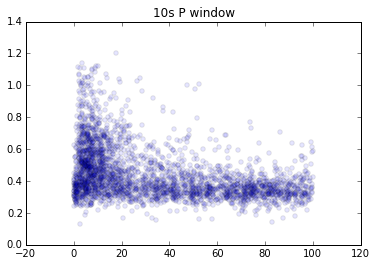

In [18]:
xc = np.loadtxt("all_btm_xcorrs10", delimiter=",")
dists = xc[:, 2]
xcorrs = xc[:, 5]
xcorr_envs = xc[:, 7]
plt.scatter(dists, xcorrs, alpha=0.1)
plt.title("10s P window")

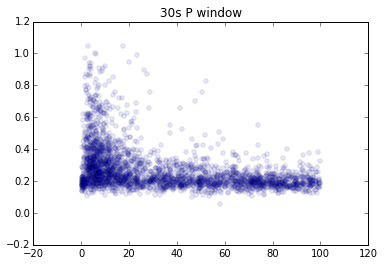

In [19]:
xc = np.loadtxt("all_btm_xcorrs30", delimiter=",")
dists = xc[:, 2]
xcorrs = xc[:, 5]
xcorr_envs = xc[:, 7]
plt.scatter(dists, xcorrs, alpha=0.1)
plt.title("30s P window")

# Picking out correlated events for jointGP testing 

In [35]:
xc = np.loadtxt("all_btm_xcorrs10", delimiter=",")
evid1 = xc[:, 0]
evid2 = xc[:, 1]
xcorrs = xc[:, 5]

correlated = xcorrs > 0.9
correlated_evids = np.concatenate((evid1[correlated], evid2[correlated]))
from collections import defaultdict
c = defaultdict(int)
for evid in correlated_evids:
    c[evid] += 1

counts = sorted(c.items(), key = lambda (k, v): v)
print counts
top_evids = [evid for (evid, c) in counts if c >= 3]

[(2589952.0, 1), (652481.0, 1), (2689290.0, 1), (2685071.0, 1), (2223638.0, 1), (653591.0, 1), (136474.0, 1), (2588835.0, 1), (848675.0, 1), (2684977.0, 1), (2161201.0, 1), (170291.0, 1), (170295.0, 1), (170272.0, 1), (2590592.0, 1), (2399729.0, 1), (2161097.0, 1), (877770.0, 1), (1646418.0, 1), (2684505.0, 1), (77914.0, 1), (876764.0, 1), (2161381.0, 1), (847586.0, 1), (2400227.0, 1), (1214821.0, 1), (2589160.0, 1), (1214444.0, 1), (9855469.0, 1), (2401134.0, 1), (9950322.0, 1), (2686073.0, 1), (2160639.0, 1), (651265.0, 2), (1648523.0, 2), (1411085.0, 2), (2225169.0, 2), (2590483.0, 2), (1942831.0, 2), (1647009.0, 2), (170277.0, 2), (651942.0, 2), (170282.0, 2), (170290.0, 2), (1411257.0, 2), (1647003.0, 2), (77900.0, 2), (170275.0, 2), (2163419.0, 2), (2162801.0, 2), (346104.0, 2), (2223355.0, 2), (3171360.0, 3), (2684748.0, 3), (170283.0, 3), (9846450.0, 3), (653889.0, 3), (878157.0, 3), (877774.0, 3), (1646670.0, 3), (2225638.0, 3), (2684917.0, 3), (9950326.0, 3), (651272.0, 4), (

In [36]:


with open("correlated_btm_evids", "w") as f:
    f.write("\n".join(["%d" % evid for evid in top_evids]))


In [39]:
all_btm_evids = set(np.concatenate((evid1, evid2)))

with open("all_btm_evids", "w") as f:
    f.write("\n".join(["%d" % evid for evid in all_btm_evids]))


In [40]:
len(all_btm_evids)

816